In [1]:
import os

In [2]:
root_dir = "/mnt/c/Users/jan.zill/code/activitysim"
example_dir = os.path.join(root_dir, "test_example_mtc_frozen_rand")

In [3]:
os.chdir(example_dir)

In [4]:
from activitysim.cli import run
import argparse

parser = argparse.ArgumentParser()
run.add_run_args(parser)
# args = parser.parse_args()
# parser.parse_args(['--sum', '7', '-1', '42'])
args = parser.parse_args(['-c', 'configs', '-o', 'output_without', '-d', 'data'])

# 2mins
run.run(args)

Configured logging using basicConfig
INFO:activitysim:Configured logging using basicConfig
INFO - Read logging configuration from: configs/logging.yaml
INFO - SETTING configs_dir: ['configs']
INFO - SETTING settings_file_name: settings.yaml
INFO - SETTING data_dir: ['data']
INFO - SETTING output_dir: output_without
INFO - SETTING households_sample_size: 100
INFO - SETTING chunk_size: 0
INFO - SETTING chunk_method: hybrid_uss
INFO - SETTING chunk_training_mode: disabled
INFO - SETTING multiprocess: None
INFO - SETTING num_processes: None
INFO - SETTING resume_after: None
INFO - SETTING trace_hh_id: None
INFO - ENV MKL_NUM_THREADS: None
INFO - ENV OMP_NUM_THREADS: None
INFO - ENV OPENBLAS_NUM_THREADS: None
INFO - NUMPY blas_opt_info libraries: ['openblas', 'openblas']
INFO - NUMPY lapack_opt_info libraries: ['openblas', 'openblas']
INFO - run single process simulation
INFO - Time to execute open_pipeline : 0.021 seconds (0.0 minutes)
INFO - preload_injectables
INFO - Time to execute prel

0

In [5]:
#129.92s (2.2mins)  w/o fru
#120.99s (2.0mins) with fru bad mem
#122.922s (2.2mins) fru

In [6]:
#from activitysim.core import pipeline
#pipeline.close_pipeline()

# check mem usage

DEBUG - matplotlib data path: /mnt/c/Users/jan.zill/code/activitysim/.venv/lib/python3.8/site-packages/matplotlib/mpl-data
DEBUG - CONFIGDIR=/home/jan/.config/matplotlib
DEBUG - matplotlib version 3.4.3
DEBUG - interactive is False
DEBUG - platform is linux
DEBUG - loaded modules: ['sys', 'builtins', '_frozen_importlib', '_imp', '_warnings', '_frozen_importlib_external', '_io', 'marshal', 'posix', '_thread', '_weakref', 'time', 'zipimport', '_codecs', 'codecs', 'encodings.aliases', 'encodings', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', '_abc', 'abc', 'io', '_stat', 'stat', '_collections_abc', 'genericpath', 'posixpath', 'os.path', 'os', '_sitebuiltins', '_locale', '_bootlocale', 'importlib._bootstrap', 'importlib._bootstrap_external', 'types', 'warnings', 'importlib', 'importlib.machinery', 'importlib.abc', '_operator', 'operator', 'keyword', '_heapq', 'heapq', 'itertools', 'reprlib', '_collections', 'collections', '_functools', 'functools', 'contextlib', 'importli

DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG - findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal 700 normal>) = 11.335
DEBUG - findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 1.05
DEBUG - findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG - findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymReg.ttf) normal normal 400 normal>) = 10.05
DEBUG - findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG - findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 11.05
DEBUG - findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
DEBUG - findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05
DEBUG - findfont: score(<Font 'STIXNonUnicode' (ST

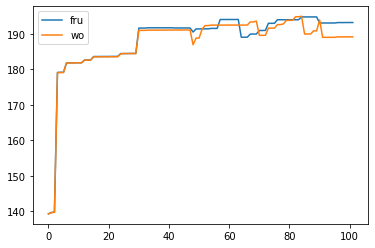

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

mem_fru = pd.read_csv(os.path.join(example_dir, "output_fru_new", "mem.csv"))
mem_wo = pd.read_csv(os.path.join(example_dir, "output_without", "mem.csv"))
(mem_fru["full_rss"].astype(int) / (1024 * 1024) ).plot(label="fru")
(mem_wo["full_rss"].astype(int) / (1024 * 1024) ).plot(label="wo")
plt.legend()

In [6]:
mem_fru.loc[mem_fru.full_rss.astype(int) == mem_fru.full_rss.astype(int).max()]

,process,pid,rss,full_rss,uss,event,children,time
84,MainProcess,11733,204_177_408,204_177_408,0,pipeline.run_model trip_scheduling finished,0,2022/06/20 23:12:18.581688
85,MainProcess,11733,204_177_408,204_177_408,0,pipeline.run after trip_scheduling,0,2022/06/20 23:12:18.675685
86,MainProcess,11733,204_177_408,204_177_408,0,pipeline.run_model trip_mode_choice start,0,2022/06/20 23:12:18.753091
87,MainProcess,11733,204_177_408,204_177_408,0,pipeline.run_model trip_mode_choice finished,0,2022/06/20 23:12:29.453365
88,MainProcess,11733,204_177_408,204_177_408,0,pipeline.run after trip_mode_choice,0,2022/06/20 23:12:29.564648
89,MainProcess,11733,204_177_408,204_177_408,0,pipeline.run_model write_data_dictionary start,0,2022/06/20 23:12:29.677146


In [7]:
mem_wo.loc[mem_wo.full_rss.astype(int) == mem_wo.full_rss.astype(int).max()]

,process,pid,rss,full_rss,uss,event,children,time
84,MainProcess,9926,204_378_112,204_378_112,0,pipeline.run_model trip_scheduling finished,0,2022/06/20 20:20:55.729949


In [8]:
mem_fru[["event", "rss"]].merge(mem_wo[["event", "rss"]], on="event", how="outer", suffixes=["_fru", ""])

,event,rss_fru,rss
0,pipeline.run before preload_injectables,146_071_552,146_051_072
1,pipeline.run after preload_injectables,146_481_152,146_460_672
2,pipeline.run_model initialize_landuse start,146_542_592,146_518_016
3,pipeline.run_model initialize_landuse finished,187_797_504,187_703_296
4,pipeline.run after initialize_landuse,187_846_656,187_764_736
...,...,...,...
97,pipeline.run after write_trip_matrices,202_510_336,198_283_264
98,pipeline.run_model write_tables start,202_510_336,198_283_264
99,pipeline.run_model write_tables finished,202_526_720,198_299_648
100,pipeline.run after write_tables,202_526_720,198_299_648


In [9]:
time_fru = pd.read_csv(os.path.join(example_dir, "output_fru_new", "timing_log.csv"))
time_wo = pd.read_csv(os.path.join(example_dir, "output_without", "timing_log.csv"))

In [12]:
time_fru.merge(time_wo, on=["process_name", "model_name"], how="outer", suffixes=["_fru", ""])

,process_name,model_name,seconds_fru,minutes_fru,seconds,minutes
0,MainProcess,initialize_landuse,1.4,0.0,1.4,0.0
1,MainProcess,initialize_households,0.7,0.0,0.6,0.0
2,MainProcess,compute_accessibility,0.3,0.0,0.2,0.0
3,MainProcess,school_location,3.7,0.1,4.7,0.1
4,MainProcess,workplace_location,9.2,0.2,5.7,0.1
5,MainProcess,auto_ownership_simulate,0.7,0.0,0.3,0.0
6,MainProcess,free_parking,0.7,0.0,0.3,0.0
7,MainProcess,cdap_simulate,11.1,0.2,8.0,0.1
8,MainProcess,mandatory_tour_frequency,1.0,0.0,1.0,0.0
9,MainProcess,mandatory_tour_scheduling,6.7,0.1,6.7,0.1


# test numpy stuff


In [4]:
import numpy as np
import pandas as pd

In [8]:
df = pd.DataFrame([[1,2,3], [4,5,6]])
display(df, df.dtypes)
df = df.astype(np.float32)
display(df, df.dtypes)

,0,1,2
0,1,2,3
1,4,5,6


0    int64
1    int64
2    int64
dtype: object

,0,1,2
0,1.0,2.0,3.0
1,4.0,5.0,6.0


0    float32
1    float32
2    float32
dtype: object

In [29]:
df.dtypes

0    float32
1    float32
2    float32
dtype: object

### random runtime

for 60 processes, we get about 21500 households per chunk. trip destination choice will have many more (several trips
 per person). Runtime increase for this is "only" 142%, but for school location and workplace location and all other
  destination choice models it is 300%.


In [5]:
n = 4000
len_df = 21500

In [6]:
%%timeit

rng = np.random.RandomState(0)
_ = np.asanyarray([rng.rand(n) for _ in range(len_df)])

1.43 s ± 17.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
%%timeit

rng_1 = np.random.default_rng(seed=0)
_ = np.asanyarray([rng_1.random(n) for _ in range(len_df)])

1.25 s ± 57.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
%%timeit

rng = np.random.RandomState(0)
_ = np.asanyarray([rng.gumbel(size=n) for _ in range(len_df)])

8.69 s ± 944 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
%%timeit

rng = np.random.RandomState(0)
_ = np.asanyarray([-np.log(-np.log(rng.rand(n))) for _ in range(len_df)])

6.24 s ± 240 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
%%timeit

rng_1 = np.random.default_rng(seed=0)
_ = np.asanyarray([rng_1.gumbel(size=n) for _ in range(len_df)])

7 s ± 261 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
%%timeit

rng_1 = np.random.default_rng(seed=0)
_ = -np.log(-np.log(np.asanyarray([rng_1.random(n) for _ in range(len_df)])))

8.01 s ± 140 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
%%timeit

rng_1 = np.random.default_rng(seed=0)
_ = np.asanyarray([-np.log(-np.log(rng_1.random(n))) for _ in range(len_df)])

5.92 s ± 340 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [27]:
rng = np.random.RandomState(0)

rng_1 = np.random.default_rng(seed=0)

In [28]:
import sys

print(sys.getsizeof(rng), sys.getsizeof(rng_1))

256 224


In [29]:
import pickle

len(pickle.dumps(rng))

2788

In [30]:
len(pickle.dumps(rng_1))

181